- Yew Brown
- Student ID: 33880799
- BSc Creative Computing
- Generative Drawing
- Goldsmiths, University of London
- 12.01.2026

# falling down stairs of light - Generative Graphic Score

## Introduction



## Concept & Background Research

- concept for piece, musical and graphic

- background with graphic scores and indeterminate/generative music 
  * in particular: love's song, ICA Creative Sound, generative pieces
  * combining approaches learnt from these
  * building on my own compositions - harmonically, conceptually a inheriting from love's song

- inspirations and research
  * John Cage - Fontana Mix
  * Cornelius Cardew
  * Iannis Xenakis - Pithoprakta
- improvisational music
  * Miles Davis - In A Silent Way
  * Alice Coltrane, Journey in Satchidananda, 03:12
- textural examples
  * Sawako

----- 05/01/26 version -----

- AtLitN Mieko Kawakami

Conceptualisation of *falling down stairs of light* began in the spring of 2025, when I was reading All the Lovers in the Night by Mieko Kawakami. In one particular passage of the novel, Kawakami describes the main character, Fuyuko, having a synesthetic fantasy about stairs made of light, while listening to a Chopin piece<sup>1</sup>. The passage also conveying that Fuyuko is feeling a sense of openness towards life, that she is capable of becomeing less stuck in her ways.

Many of my previous musical works feature light and natural imagery as central themes and influences **(ref. spring twilight or wolcnuonþærelyfte)**. Following this thematic thread, when watching afternoon light filtering scading through tree canopies, the imagery from All the Lovers in the Night came to mind, but as a source for sound creation; the idea of a harp falling down stairs of light. 
Building on that concept lead to the creation of this composition and the idea for this score: lines drawn through stochastic, generative processes imitating sunlight cascading through clouds, trees branches and windows. 
Similarly, the feelings of excitement, emotional lightness, openness towards and freedom expressed by Kawakami, also fed into the conceptualisation of the appearance of the score.

- ICA Creatives

An earlier influence in the creation of this score, was my experience as a participant in of ICA Creatives Sound, at the Institute of Contemporary Art (ICA) in London, between November 2023 and May 2024. In a series of workshops we explored the collective development and exploration of sonic art, with a significant focus on the creation of graphic scores.
The workshops culminated in a collective performance at the ICA from the participants. As a part of this performance we ran a graphic score workshop for audience members, to create scores based off of prompts that we had made as a group. These graphic scores were then projected onto a screen, and interpreted as free improvised music and sonification by the collective back to the audience **(ref. Ceris's Soundcloud or ICA?)**.

The experience as a part of ICA creatives, gave me useful insight into the ability of performers to spontaneously interpret abstract scores with little direction, in order to produce joyful, engaging and enteraining performances. This insight is something I have carried forward into my considerations for this graphic score, in how abstract it is able to be with its representations of sound for the performer to interpret.

- love's song

At a similar time to the ICA performance in 2024, I composed a piece called *love's song* **(ref)**. This piece explores the indeterminate interpretation of a score, by the performer improvising use of pre-composed melodic fragments and instructions within specified windows of time. The score features fragments of melody in traditional notation accompanied by instructions on a single side of paper.

Acknowledging *love's song*, going into *falling down stairs of light* I wanted to explore greater uncertainty and fluid structure through computational processes in the generattion of unique scores for each performance, and how this could come across in sound of the piece. 

- further research into graphic scores 
- musical influences - improvisation, texutre/etc, indeterminacy

Some further research conducted includes renowned graphic score works, as reference points for sonic representation and instruction, as well as musical works as reference for musical features and aesthetics.

These works include John Cage's *Fontana Mix* **(ref)**, Cornelius Cardew's *Treatise* **(ref)** as references for graphic score. 
Cardew's score, while a great example of archetectural and psychologically driven design, had little influence on the end result of this score, besides its openess for interpretation and abstract forms. As these domains in the of creation of graphic scores, was not of direct concern for this piece as technical processes in applying computational generative techniques was the more significant focus.
*Fontana Mix*, although not computational, influenced some of my choices through its variablity across multiple uses, and the application of ambient and non-musical sounds in present in its interpretations.

More explictly sonic influences include the textures and spaciousness of works by the artist sawako **(ref)**, inclusion of harp glissandi and improvisation in works by Alice Coltrane **(ref)**, as well as improvisation and static harmony featuring on Miles Davis' In A Silent Way **(ref)**). Elements of all of these contributed to compositional choices in the sound of the piece, which are reflected in the score. For example, lines' textures and trajectories representing descending glissandi, or the progressive tangling of lines representing open choice and freedom in improvisation.

## Technical Implementation

- explain development process
  - representing cascading light and komorebi in a score to be interpreted in musical performance
In making the graphic score for *falling down stairs of light*, creative decsions were made, such as giving lines a bias towards the right of the canvas, X axis variation for wavering texture and structuralised dynamic variation of skew and X deviation intensity, as ways of mimicking cascading light.

- lift example functions out of the code w executable demostrations of what they do (e.g. numerically) 
  * clarify important parts of the code and what they do - escpecially more arcane parts

- show some iterations of the code - notes made while developing - examples of what was produced at different stages - even if code is lost (explain what was going on in that code to produce it)
- points that were challenging?

Beginning the development process of the code of *falling down stairs of light*, a completed version of the Line Tracing programme code from Generative Drawing, Lab 1 **ref. include on GitHub**, was utilised as a strating point. 
Knowing that the graphic score would include contoured, vertically drawn lines, the Line Tracing code was a perfect starting point, as it does both those things, although in a slightly different and simpler way.

Building on top of the Line Tracing code, the tracing behaviour was removed, but the mechanism for contouring the lines, was kept; contours were then determind by deviating X axis values along vertical nodes - spaced by visualisation of harmonic ratios, between just intervals forming an extended chord and full scale clusters derived from the harp tuning utilised in the composition. 

- images of developent stage results
- code examples?

Following this, further probabilistic randomisation, refinement and bug fixes were added to the code. To bring the code closer to its desired result. These randomisation processes involed selecting which nodes to assign randomised X values to, and subtly randomising the Y positions of nodes. Introducing more interesting textures to the lines.

- images
- code examples?

Other additions included multiple passes of the canvas, drawing new lines in between and overlapping with previous ones. Setting up the mechanism for structure dynamics.

- images
- code examples?

Dynamic structural elements were then introduced. These elements use randomisation of structural positions on the canvas - X position of nodes, and across time - pass of the canvas being drawn; repectively called the micro and macro dynamic processes.

- images

Further development of these structural functions added the use of guassian distributions in their randomisation processes. Distributing randomised positions around a central value, with exponentially decreasing probability either side positively or negatively. This distribution of probilities, more closely representing natural and aesthetically pleasing distributions than the linear randomisation used prior.
Guassian distributions of proability were also simultaneously extended to all other randomisation process established within other functions in the code.

- images

Towards the end of the development process a line skew was added, using randomisation to give lines a diagonal bias towards the right of the canvas, or positive X value bias. This change helped further represent the impression of trajectories of cascading light, added more interesting texture through new overlaps and relationships between lines. From another interpretation, also creating a folding fabric-like texture to the emergent whole of woven lines.

- image

Minor tweaks here and there, explorations with colour, values and contraints of randomisation ranges ensued. Experimenting with the appearance of the score and ironing out bugs. 

A final adjustment, leading to the current stage reframed the individual lines and emergent whole on the canvas, creating space and showing all the stray line ends. This was done by compressing the ranges of Y values that lines nodes were mapped between, as well as the X values lines could be drawn between; rescaling line spacing and other related values.
Reframing the score allows it more space, a more dynamic, varied outline and a sense of weightlessly floating in the air, previously missing.

- image

- - - - -

- In this section break down the code into individual function to explain their working
  - core functions and important mechanisms for understanding the code
- make functions run in isolation with an output illustrating what they do

24 [220, 110, 440, 110, 330, 110, 110, 110, 0, 220, 550, 550, 0, 440, 110, 220, 110, 0, 440, 550, 440, 440, 110, 330, 330, 220, 0, 220, 110, 0, 330]


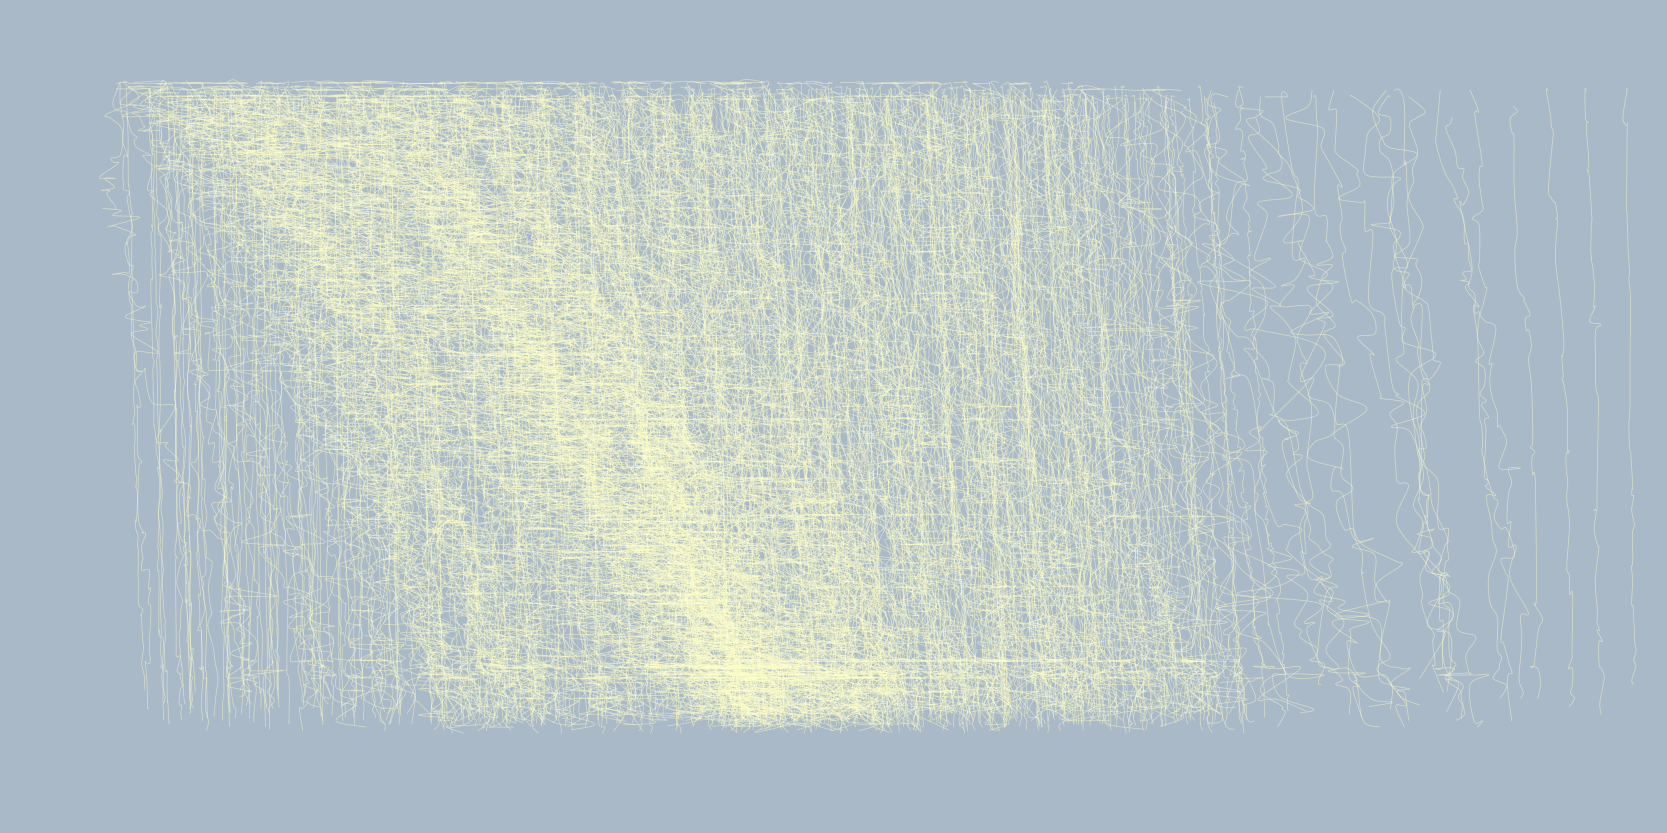

In [3]:
# WIP code refactoring

from py5canvas import *

import random
import numpy as np

create_canvas(1667, 833)

background(170,185,200)
fill(250,255,200,125)
stroke(255,255,200,125)
stroke_weight(0.33)

# distance the vertical lines are apart
line_spacing = width/80; 

# initial pen position
x, y = 0, 0

# draws a curve connecting line points
def draw_line(x_bias, x_random, sum_lin):
    
    stroke_weight(0.75)
    no_fill() # stops lines being filled in as a shape
    begin_shape()
    for i in range(len(sum_lin)):
        curve_vertex(x + x_random[i] + x_bias[i], sum_lin[i] + y_offset) # <- tidy &/or calarify values used here 
    end_shape()

# [8,10,11,12,15], 15:12:11:10:8 polyrhythm - alt. expanded values: [24,27,30,33,36,40,45], full scale cluster ratios 1 2 3 ^4 5 6 7
polyrhythm_nodes = [24,27,30,33,36,40,45]

# initalise empty lists <- better in the calc_lines function?
line_calcs = []
summed_line = []

def calc_lines(): # <- separate into 2 functions calc and sum - better modularity - it's not crazily long, though
    global line_calcs, summed_line

    line_calcs = []
    summed_line = []

    for lin in range(int((width*0.33)/line_spacing)):
        summed_line.append([]) # create new nested array for each line
        
        # calculate y values for each component pulse in the polyrhythm 
        for i in range(len(polyrhythm_nodes)):
            calc_y = height * 0.1
            line_calcs.append([])
            for j in range(polyrhythm_nodes[i]):
                line_calcs[i].append(calc_y)
                calc_y += int(((height*0.8)-10)/polyrhythm_nodes[i])
                # print(calc_y)

        # sum calculated line nodes (todo: sum rhythms/patterns expressed via x vals) into 1 line
        for i in range(len(polyrhythm_nodes)):
            for j in range(polyrhythm_nodes[i]):
            # 1/3 chance that a pulse is selected for use per component pulse - random pattern generation
                node_select = np.random.normal(1.167,1.167) # resolution of polyrhthm - was random.uniform(0,2.33)
                # print(node_select) 
                node_chance = micro_node_density(draw_pass,x) + macro_node_density(draw_pass)
                if node_select < node_chance: 
                    summed_line[lin].append(line_calcs[i][j])

            if node_select < node_chance: 
                summed_line[lin].append((height*0.8)-5)   

        summed_line[lin].sort() # not necessary, but good for readability 

# vv better initialised inside function?
macro_pos = 0
micro_pos = []
# determine which pass of the canvas to centre macro dynamic peak on
def dynamic_form(passes): 
    divisions = [0,1,2,3,4,5] # positions along the duration of the score (no. passes) the macro peak can occur

    macro_pos = int((passes/5) * random_choice(divisions)) # gives which pass to centre gaussian dynamic peak on

    for p in range(passes): # do for each pass
        micro_pos.append(int(((width*0.33)/5) * random.choice(divisions)))

    print(macro_pos, micro_pos)
            
    return [macro_pos, micro_pos] 

# calculate gaussian field centred on determined x position per pass
def gaussian_field(current_pos, centre, range):
    return np.exp(-((current_pos - centre)**2) / (2 * range**2)) 

# include default values that prevent lines from being dead straight - if gaussian_weight < 0.1(for e.g.): x & node = default vals
# also use dynamics to change bias (drift) of lines?


# -- dynamic variations across all passes of the canvas -- 

def macro_x_variation(draw_pass):
    x_var_loc = 0
    x_var_scale = 0

    centre = macro_pos
    sigma = 2
    gaussian_weight = gaussian_field(draw_pass, centre, sigma)
    
    # prevent lines from becoming totally straight/nodeless by keeping gaussian_weight away from ~0.0
    if gaussian_weight < 0.075:
        gaussian_weight = 0.075

    x_var_loc = abs(gaussian_weight * np.random.normal(3, 2)) # 11,6
    x_var_scale = abs(gaussian_weight * np.random.normal(5, 4)) # 19,12

    # print(x_var_loc, x_var_scale)

    return [x_var_loc, x_var_scale]

def macro_line_drift(draw_pass):
    x_bias_loc = 0
    x_bias_scale = 0

    dec_line_spacing = 0

    # dynamically decrease line_spacing along with increased drift

    centre = macro_pos
    sigma = 2
    gaussian_weight = gaussian_field(draw_pass, centre, sigma)
    
    # prevent lines from becoming totally straight/nodeless by keeping gaussian_weight away from ~0.0
    if gaussian_weight < 0.075:
        gaussian_weight = 0.075

    x_bias_loc = abs(gaussian_weight * np.random.normal(1.5, 1)) 
    x_bias_scale = abs(gaussian_weight * np.random.normal(2, 1)) 

    dec_line_spacing = abs(gaussian_weight * np.random.normal(5.5, 2)) # at highest dynamics no. to detract from line_spacing

    return [x_bias_loc, x_bias_scale, dec_line_spacing]

def macro_node_density(draw_pass):
    node_density = 0.0

    centre = macro_pos
    sigma = 2 # width of gaussian bell curve applied to passes of canvas (effect either side of centre pass)
    gaussian_weight = gaussian_field(draw_pass, centre, sigma)
    # print(gaussian_weight)
    
    if gaussian_weight < 0.075:
        gaussian_weight = 0.075

    node_density = abs(gaussian_weight * np.random.normal(0.5,0.33)) # 0.5,0.33

    return node_density


#  -- dynamic variations per individual pass of the canvas --

def micro_x_variation(draw_pass, current_x):
    x_var_loc = 7
    x_var_scale = 12

    centre = micro_pos[draw_pass - 1]
    sigma = (width*0.33)/5 # gaussian apllication of dynamics  either side of centre x value per pass
    gaussian_weight = gaussian_field(current_x, centre, sigma)

    if gaussian_weight < 0.05:
        gaussian_weight = 0.05

    x_var_loc = abs(gaussian_weight * np.random.normal(7,5)) # 13,10
    x_var_scale = abs(gaussian_weight * np.random.normal(9,7)) # 19,15

    return [x_var_loc, x_var_scale]

def micro_line_drift(draw_pass, current_x):
    x_bias_loc = 0.75
    x_bias_scale = 1.5

    dec_line_spacing = 0

    centre = micro_pos[draw_pass - 1]
    sigma = (width*0.33)/5
    gaussian_weight = gaussian_field(current_x, centre, sigma)

    if gaussian_weight < 0.05:
        gaussian_weight = 0.05

    x_bias_loc = abs(gaussian_weight * np.random.normal(2,4))
    x_bias_scale = abs(gaussian_weight * np.random.normal(4,3))

    dec_line_spacing = abs(gaussian_weight * np.random.normal(5.5, 2))

    return [x_bias_loc, x_bias_scale, dec_line_spacing]

def micro_node_density(draw_pass, current_x):
    node_density = 1.0
        
    centre = micro_pos[draw_pass - 1]
    sigma = (width*0.33)/5
    gaussian_weight = gaussian_field(current_x, centre, sigma)

    if gaussian_weight < 0.05:
        gaussian_weight = 0.05
    
    node_density = abs(gaussian_weight * np.random.normal(1.5, 0.5)) # 1.5, 0.5

    # print(node_density)

    return node_density

y_offset = 0
# draw polyrhythm nodes to connect lines between
def draw_nodes(): # <- refactor into smaller functions?
    global x, line_spacing

    # r_val = 170
    # g_val = 186
    # b_val = 80
    # alpha_val = 155

    # macro_bias_space = macro_line_drift(draw_pass)[2]

    # line_spacing = int(22 - macro_bias_space) # add init_line_spacing variable?

    for lin in range(int((width*0.33)/line_spacing)):
        # line-node variation
        x_random = []

        # line-node drift
        x_bias = []
        bias_random = 0 
        micro_bias_space = micro_line_drift(draw_pass,x)[2]

        line_spacing = int(width/80 - micro_bias_space) # add init_line_spacing variable?

        # print(line_spacing)

        for i in range(len(summed_line[lin])):
            # stroke(r_val, g_val, 80, alpha_val)

            # only call macro once outside of loop, then call once here? - not needed, calling mult times won't regenerate peak
            x_var_loc = micro_x_variation(draw_pass,x)[0] + macro_x_variation(draw_pass)[0]
            x_var_scale = micro_x_variation(draw_pass,x)[1] + macro_x_variation(draw_pass)[1]

            x_bias_loc = micro_line_drift(draw_pass,x)[0] + macro_line_drift(draw_pass)[0]
            x_bias_scale = micro_line_drift(draw_pass,x)[1] + macro_line_drift(draw_pass)[1]
            # make more efficient by only calling functions once? (store returned vals in arrays?)

            # print(x_var_loc, x_var_scale)

            x_random.append(np.random.normal(x_var_loc, x_var_scale)) 
            # generate randomised x vals, the same for each circle and equiv line bend and store in list

            bias_random += np.random.normal(x_bias_loc, x_bias_scale)
            x_bias.append(x + bias_random) # try to give lines trajectory towards to the right as the line progressses
            
            stroke_weight(1)
            # fill(r_val, g_val, b_val, alpha_val)
            # circle(x + x_random[i] + x_bias[i], summed_line[lin][i] + y_offset, np.random.normal(1,0.5))
            # r_val -= 0.1
            # g_val += 0.02
            # b_val += 0.2
            # alpha_val -= 0.05
            # print(r_val, g_val, b_val, alpha_val)

        # call line function
        draw_line(x_bias, x_random, summed_line[lin])
        # store all x values for a line to be called at once in the draw_line() loop per line

        # move to the right
        x += line_spacing

num_passes = 31
draw_pass = 0
# manage number of passes and line offsets, call functions to draw each pass
def draw_passes():
    global x, y_offset, draw_pass, alpha_val

    x_init = width * 0.033
    x_offset = 0

    x = x_init

    dynamic_form(num_passes)
    
    while draw_pass < num_passes: # higher than division of ~line_spacing to cause overlap
        calc_lines()

        # alpha_val -= 5
        draw_nodes()
        #draw_text()
        # save(f'images/per_pass_score/07_score_pass_24_polyrhythm_{draw_pass}.png') # save image for each pass
        
        draw_pass += 1
        x_offset += (line_spacing*1.104)/13 # adding some interesting displacement in overlap
        y_offset += random.uniform(-1, 3) # np.random.normal(1,2)
        x = x_init + x_offset

        # print(f"pass made {draw_pass}")

# save('images/no_dotes_sparse_131115.png')
    
draw_passes()

show()

# wide rescale acting strange - 
# - possibly bc dynamics are maped relatively onto width (width * ...), while line spacing is fixed (val in pixels)
# ^ now adjusted

# dynamics skewed towards density in the first 1/2-2/3 - try to spread more evenly

## notes for above code

create animation - do original idea without drawing machine (can create noise via OSC connection to supercollider/etc?)

to animate:
- use py5 "draw():" loop
- replace for() loops that iterate through nodes/lines with the draw loop itself? - so it is drawn/animated at the rate of the draw loop

## Reflection & Future Development

TBD FOLLOWING ANY FURTHER DEVELOPMENT

- tweaking/adding subtle randomisation/variation parameters for more nuanced results
- adding control function to more easily get varied iterations
- improve framing/form/presentation of the score
- adding higher dimensions projected into 2D
- utilising for a live performance/other musicians
- incorperating into a genreative music component (e.g. via OSC to SuperCollider) for performance
  * especially limited performances, e.g. without a drawing machine or solo

A major limitation of the code is inefficiency, as it runs incredibly slowly - the current version taking approximately ten seconds to generate its output on my machine.
While this is acceptable for its current use, it is not ideal, especially for futer development. Currently versions are to be generated for use via drawing machine or as a complete whole, before being interpreted by a performer. However future developments my be hindered by this inefficiency. Anything involving live interpretation my be hindered, such as animating the drawing process or communicating data to another programme - e.g. SuperCollider via Open Sound Control (OSC).

Despite this shortcoming, the result is otherwise pleasing. I personally think the aesthetics of the score, process of generation, final output of lines and adaptabilty of values to produce varied outputs **ref example images?**, all live up to the original concept and vison for the piece. I believe, at a minimum within its intended use case, the outcome is fully effective and implementable as a graphic score for musical interpretation with or without instructions provided.
These, however, are my thoughts as the artist self-assessing the work. Testing the score's effectiveness in practice and reviewing by others from varied artistic, musical and computational backgrounds, will provide the most accurate feedback and assessment.

Beyond its current state, I would like to develop it further. Possible developents include animation of the drawing process, use of OSC and SuperCollider to generate sound from score derived data, and extension of line dimensions into three (3D) or four (4D) spacial dimensions projected onto the 2D canvas, via introduction of Z and W axis values.
These ideas provide possibilities to adapt the sound generaton and performance into new, more varied contexts, as well as introduce new textures and possibilities visually through rotating in and projecting down from higher spacial dimensions. New spacial possibilities enabling for development into installations, beyond the limitations of 2D drawing processes.

## Application in Practice

- playing it, using it as a score!

## References

- what has influenced the work, can provide more context to the reader



1. All the Lovers in the Night, Mieko Kawakami - page 147
- "In my chair, I surrendered myself to a world of sound that could only be described as sparkling. It made my head sway, and my breath grew deeper as my legs climbed up that evanescent staircase, each step a sheet of light. They would shimmer to life the second my sole made contact, then fizzle into stardust when I lifted my foot, only to be reborn as yet another step, gently showing me the way. That slowly winding spiral stairway of light ascended freely through the dark, and though I was unsure where it was taking me, or what I would find when I arrived, as long as the music was playing, I knew that there was nothing to fear, that I could go anywhere at all."